<a href="https://colab.research.google.com/github/williamshiaogit/DL-ML-AI-learning/blob/master/distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGaEmNWR_2ARhLBjDMC7xahYrc3EXdUhBvSVVdRKReaUWizTGC5xng
Mounted at /content/drive


In [ ]:
!pip install dlib

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 98kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=26e7a9a48ad19bb2ceab9100bb41931597779655f53dd7e82c4c34404bd93e57
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import os
import cv2
import glob
import json
import numpy as np
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt

In [ ]:
# with open( '/content/drive/My Drive/machine-learning/project/code/data_add_face_vector_1000_update.json','r' ) as outfile:
#     datas_1000 = json.load(outfile)
# with open( '/content/drive/My Drive/machine-learning/project/code/data_add_face_vector_2000_update.json','r' ) as outfile:
#     datas_2000 = json.load(outfile)
# with open( '/content/drive/My Drive/machine-learning/project/code/data_add_face_vector_3000_update.json','r' ) as outfile:
#     datas_3000 = json.load(outfile)
# with open( '/content/drive/My Drive/machine-learning/project/code/data_add_face_vector_4000_update.json','r' ) as outfile:
#     datas_4000 = json.load(outfile)

In [ ]:
# # 確認一下有 face_vector 的數量確實有 1000 個，雖然有一些會是空陣列
# i = 0 
# for data in datas_1000:
#     if 'face_vector' in data:
#         i += 1
# i

1000

In [ ]:
# # 確認一下有 face_vector 的數量確實有 1000 個，雖然有一些會是空陣列
# i = 0 
# for data in datas_2000:
#     if 'face_vector' in data:
#         i += 1
# i

1000

In [ ]:
# # 確認一下有 face_vector 的數量確實有 1000 個，雖然有一些會是空陣列
# i = 0 
# for data in datas_3000:
#     if 'face_vector' in data:
#         i += 1
# i

1000

In [ ]:
# # 確認一下有 face_vector 的數量確實有 1000 個，雖然有一些會是空陣列
# i = 0 
# for data in datas_4000:
#     if 'face_vector' in data:
#         i += 1
# i

1442

In [ ]:
# datas = datas_1000[:1000] + datas_2000[1000:2000] + datas_3000[2000:3000] + datas_4000[3000:]

In [ ]:
# # 存入 json
# with open( '/content/drive/My Drive/machine-learning/project/code/data_add_face_vector_all_update.json','w' ) as outfile:
#   json.dump(datas, outfile, ensure_ascii=False)

In [ ]:
with open( '/content/drive/My Drive/machine-learning/project/code/data_add_face_vector_all_update.json','r' ) as outfile:
    datas_1000 = json.load(outfile)

FileNotFoundError: ignored

In [ ]:
len(datas)

4442

In [ ]:
# 確認一下有 face_vector 的數量確實有 1000 個，雖然有一些會是空陣列
i = 0 
for data in datas:
    if 'face_vector' in data:
        i += 1
i

4442

In [ ]:
# encodings 是一個陣列裡面有多個 128 維度的 numpy

titles, imgs, vectors=[], [], []

for data in datas:
    if 'face_vector' in data:
        for url,vct in data['face_vector'].items():
            titles.append(data['title'])
            imgs.append(url)
            vectors.append(vct)

df = pd.DataFrame([titles, imgs, vectors]).T
df

,0,1,2
0,[正妹] 防疫期間多洗手 乳,https://imgur.com/yfJP86f.jpg,"[-0.04358586668968201, 0.018122412264347076, 0..."
1,[正妹] 防疫期間多洗手 乳,https://imgur.com/TJlW7kO.jpg,"[-0.04885426163673401, -0.0077091604471206665,..."
2,[正妹] 防疫期間多洗手 乳,https://imgur.com/y6ABfoR.jpg,"[-0.06836181879043579, 0.05527924746274948, 0...."
3,[正妹] 防疫期間多洗手 乳,https://imgur.com/9mkGzjN.jpg,"[-0.03894506394863129, 0.046570636332035065, 0..."
4,[正妹] 防疫期間多洗手 乳,https://imgur.com/vmHRZ8Y.jpg,"[-0.040326014161109924, 0.06876949220895767, 0..."
...,...,...,...
34066,[正妹] 戀愛惹 ☺,https://i.imgur.com/adrx4iA.jpg,"[-0.020232386887073517, -0.001902892254292965,..."
34067,[正妹] 戀愛惹 ☺,https://i.imgur.com/eUsBWZH.jpg,"[-0.04927816241979599, 0.05535317584872246, 0...."
34068,[正妹] 戀愛惹 ☺,https://i.imgur.com/RX99SBW.jpg,"[-0.0820038840174675, 0.026779673993587494, 0...."
34069,[神人] 網友長這樣...,https://i.imgur.com/TFK5Uft.png.jpg,"[-0.057885948568582535, 0.059962332248687744, ..."


In [ ]:
# 給 dataframe 欄位
df.columns = ['title','img','vector']
df

,title,img,vector
0,[正妹] 防疫期間多洗手 乳,https://imgur.com/yfJP86f.jpg,"[-0.04358586668968201, 0.018122412264347076, 0..."
1,[正妹] 防疫期間多洗手 乳,https://imgur.com/TJlW7kO.jpg,"[-0.04885426163673401, -0.0077091604471206665,..."
2,[正妹] 防疫期間多洗手 乳,https://imgur.com/y6ABfoR.jpg,"[-0.06836181879043579, 0.05527924746274948, 0...."
3,[正妹] 防疫期間多洗手 乳,https://imgur.com/9mkGzjN.jpg,"[-0.03894506394863129, 0.046570636332035065, 0..."
4,[正妹] 防疫期間多洗手 乳,https://imgur.com/vmHRZ8Y.jpg,"[-0.040326014161109924, 0.06876949220895767, 0..."
...,...,...,...
34066,[正妹] 戀愛惹 ☺,https://i.imgur.com/adrx4iA.jpg,"[-0.020232386887073517, -0.001902892254292965,..."
34067,[正妹] 戀愛惹 ☺,https://i.imgur.com/eUsBWZH.jpg,"[-0.04927816241979599, 0.05535317584872246, 0...."
34068,[正妹] 戀愛惹 ☺,https://i.imgur.com/RX99SBW.jpg,"[-0.0820038840174675, 0.026779673993587494, 0...."
34069,[神人] 網友長這樣...,https://i.imgur.com/TFK5Uft.png.jpg,"[-0.057885948568582535, 0.059962332248687744, ..."


In [ ]:
# 因為存進 json 裡的時候不能用 numpy 型態存要轉成 list 存
# 所以取出的時候要額外把它每一個值都 convert 成 numpy 型態
# 這樣等等 face_distance() 函式才能正確執行
 
vector_numpy = np.array([np.array(x) for x in df['vector']])
print(vector_numpy)
print(vector_numpy.shape)

[[-0.04358587  0.01812241  0.01121232 ... -0.00722411  0.11209846
   0.01175799]
 [-0.04885426 -0.00770916  0.08746056 ... -0.04586897  0.05582654
   0.03404655]
 [-0.06836182  0.05527925  0.0058714  ... -0.12644881  0.12917694
  -0.03149039]
 ...
 [-0.08221781  0.07898805  0.0692467  ... -0.07849231  0.06144162
   0.00557957]
 [-0.09127833  0.11848078  0.08917981 ... -0.09934641  0.00120628
   0.01864638]
 [-0.08786374  0.06254554  0.04829307 ... -0.05171374  0.06794476
   0.00310664]]
(8101, 128)


跟這篇 po 文最像:
[正妹] Itzy lia
距離： 0.3154603911777062


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


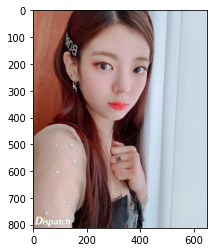


原圖


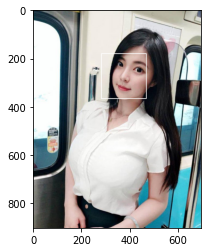

In [ ]:
import requests
import cv2

# url = input("網址:")
# response = requests.get(url, stream=True, verify=False)
# img = face_recognition.load_image_file(response.raw)
img = face_recognition.load_image_file('07.jpg')

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, vector_numpy)
    # for d, n in zip(distances, df['title']):
    #     print("跟", n, "的距離是:", d)
    # print(distances.argmin())

    print("跟這篇 po 文最像:")
    print(df['title'][distances.argmin()])
    print("距離：",distances[distances.argmin()])

    response = requests.get(df['img'][distances.argmin()], stream=True, verify=False)
    raw_img = face_recognition.load_image_file(response.raw)
    plt.imshow(raw_img)
    plt.show()


print()
print("原圖")
plt.imshow(img)
plt.show()